# Plotting multipoles

In [1]:
import os
import glob

import numpy as np
from matplotlib import pyplot as plt

In [2]:
# These lines of code are setting various parameters for the appearance of plots created using the matplotlib library. 
plt.rc('font', family='serif')
plt.rc('text', usetex=False)
plt.rc('font', family='serif', size = 20)
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['ytick.right'] = True
plt.rcParams['figure.figsize'] = (16.0, 8.0)
plt.rcParams['xtick.major.width']  = 1
plt.rcParams['ytick.major.width']  = 1
plt.rcParams['xtick.major.pad']= 8

In [3]:
def read_xi(plot=False):
    # Reading correlation function from file
    import glob
    import os
    import numpy as np
    from matplotlib import pyplot as plt

    from cosmoprimo.fiducial import DESI
    cosmo = fiducial = DESI()

    tracer = 'LRG'
    zmin, zmax, z, b0 = {'LRG': (0.4, 1.1, 0.8, 1.7), 'ELG': (1.1, 1.6, 1.1, 0.84), 'QSO': (0.8, 2.1, 1.4, 1.2)}[tracer]

    base = '/global/cfs/cdirs/desi/survey/catalogs/main/mocks/FirstGenMocks/AbacusSummit/Y1/mock1/LSScats/'
    data_dir = base + 'blinded/jmena/test_w0-*/LSScats/blinded/'

    fn_list = sorted(glob.glob(os.path.join(data_dir, 'blinded_parameters_{}.csv'.format(tracer))))

    from desilike.theories.galaxy_clustering import ShapeFitPowerSpectrumTemplate, KaiserTracerCorrelationFunctionMultipoles
    theory = KaiserTracerCorrelationFunctionMultipoles(template=ShapeFitPowerSpectrumTemplate(z=z))
    
    for ill, ell in enumerate(theory.ells):
        for j in fn_list:
            w0_blind, wa_blind, f_blind = np.loadtxt(j, delimiter=',', skiprows=1)
            cosmo = fiducial.clone(w0_fld=w0_blind, wa_fld=wa_blind)
            qpar_blind = cosmo.efunc(z) / fiducial.efunc(z)
            qper_blind = fiducial.comoving_angular_distance(z) / cosmo.comoving_angular_distance(z)
            df_blind = f_blind / cosmo.growth_rate(z)
            poles = theory(qpar=qpar_blind, qper=qper_blind, df=df_blind)
            
            # poles_unblind = theory(qpar=1., qper=1., df=1.)
            # plt.plot(theory.s, theory.s**2 * (poles[ill]-poles_unblind[ill])/poles_unblind[ill], label='w0:{:.2}, wa:{:.2}, f:{:.2}'.format(w0_blind, wa_blind, f_blind))
            plt.plot(theory.s, theory.s**2 * poles[ill], label='w0:{:.4}, wa:{:.4}, f:{:.4}'.format(w0_blind, wa_blind, f_blind))
            plt.legend(loc='upper right', fontsize=9)

            plt.xlabel(r'$s$')
            plt.ylabel(r'$s^{2} \xi_%d(s)$ [$(\mathrm{Mpc}/h)^{2}$]'% ell)


        poles_unblind = theory(qpar=1., qper=1., df=1.)
        plt.plot(theory.s, theory.s**2 * poles_unblind[ill], 'k--', label='unblinded')
        plt.legend(loc='upper right', fontsize=9)
        plt.show()

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)
/global/cfs/cdirs/desicollab/users/adematti/perlmutter/cosmodesiconda/20221205-1.0.0/code/cosmoprimo/main/lib/python3.10/site-packages/cosmoprimo/eisenstein_hu.py:23: UserWarning: EisensteinHuNoWiggleEngine cannot cope with massive neutrinos
  warnings.warn('{} cannot cope with massive neutrinos'.format(self.__class__.__name__))


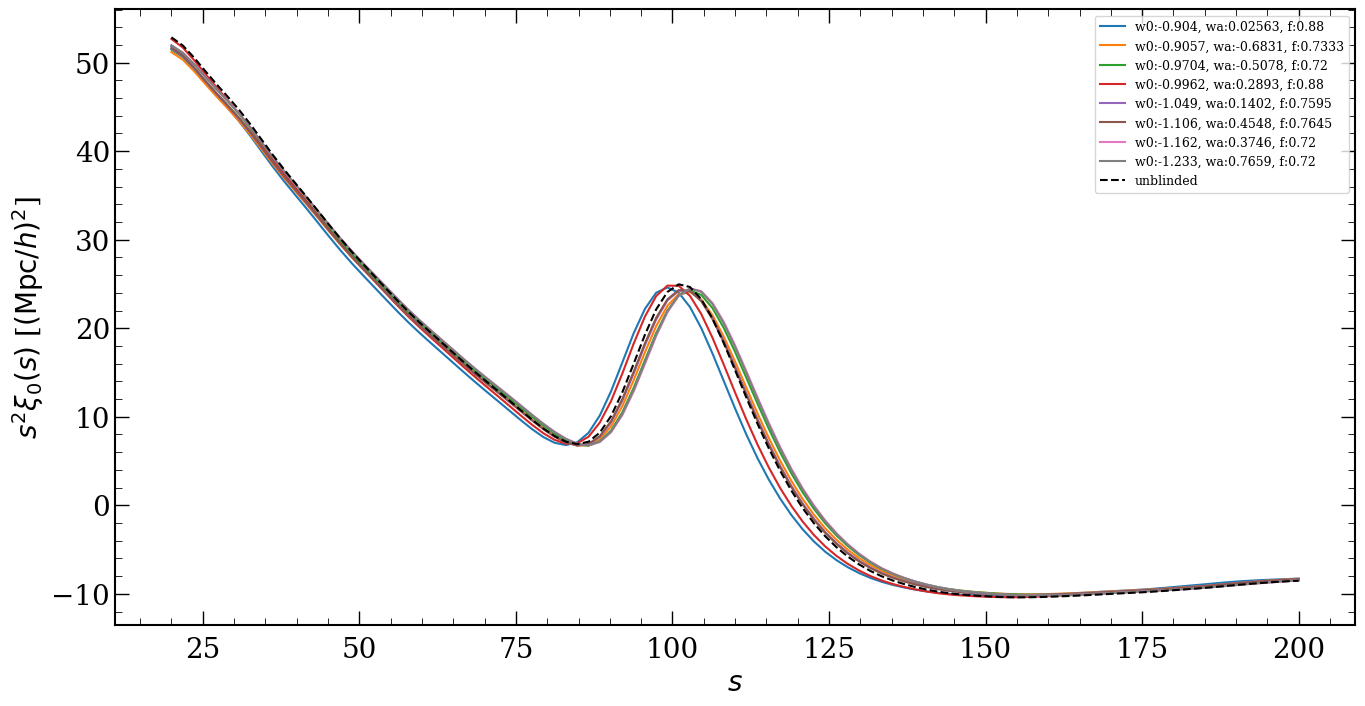

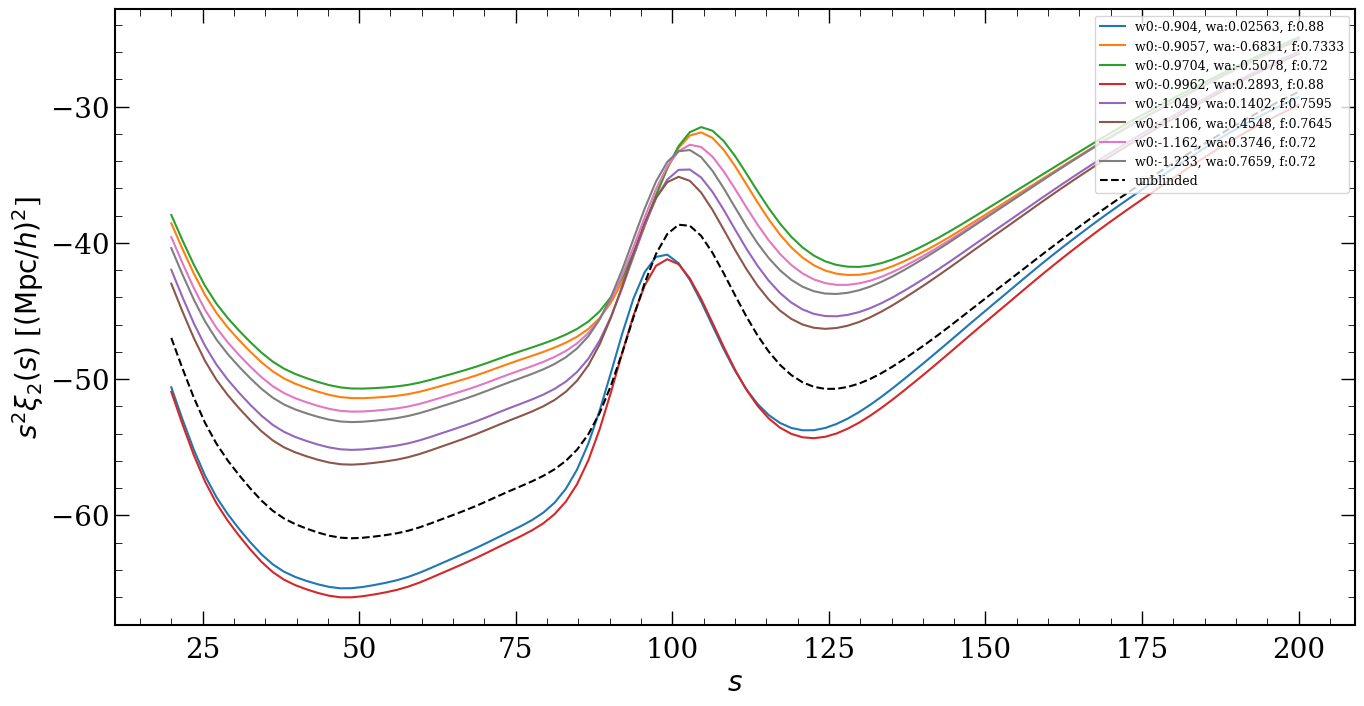

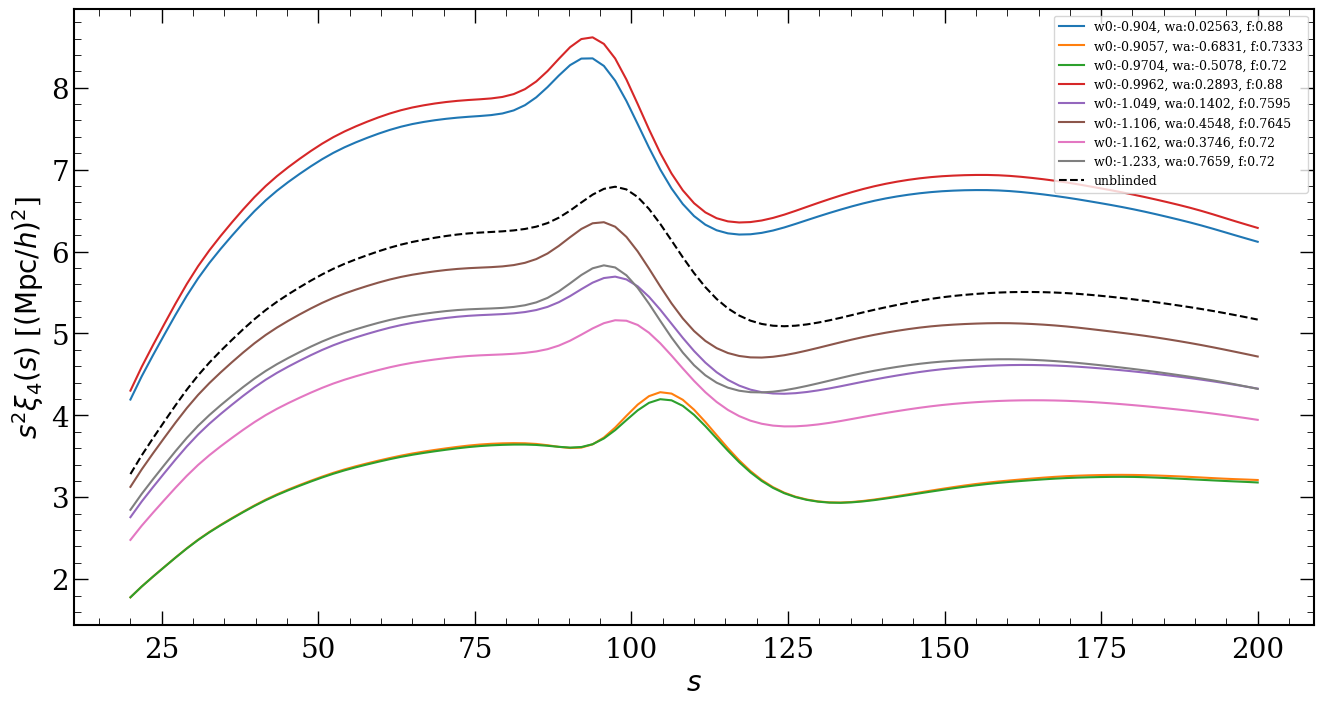

In [4]:
read_xi(plot=True)